# Homework 2

### 1. Visualization of the Dataset

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 

sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")
%matplotlib inline



In [135]:
plot_data = pd.read_csv('data.csv',sep=' ')
plot_data.describe()

,x1,x2
count,100.000000,100.000000
mean,4.899030,4.852420
std,0.706047,2.260844
min,3.502000,2.001000
25%,4.332750,2.599500
50%,4.934500,4.596500
75%,5.436000,7.358250
max,6.229000,8.000000


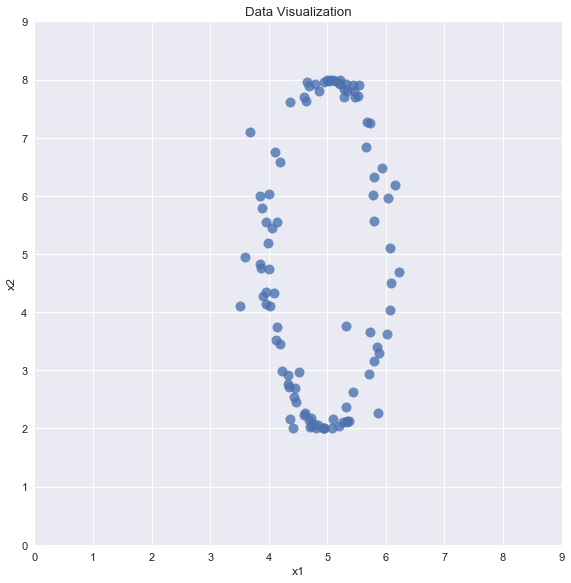

In [111]:

_plot = sns.lmplot('x1', 'x2', 
           data=plot_data, 
           fit_reg=False, 
           size=8,
           scatter_kws={"marker": "D", 
                        "s": 100})
axes = _plot.axes
axes[0,0].set_xlim(0,9)
axes[0,0].set_ylim(0,9)
plt.title('Data Visualization');
plt.xlabel('x1');
plt.ylabel('x2');


### 2. Propose a Generative Model

In [136]:
X1 = plot_data['x1']
X2 = plot_data['x2']
x1_min,x2_min = min(X1),min(X2)
x1_max,x2_max = max(X1),max(X2)
print(x1_min,x1_max,x2_min,x2_max)

3.502 6.229 2.001 8.0


The above model could be interpreted as a vertical ellipse with a center being $(5,5)$ without the noise data.

The range of the $x1$ is between $[3.5,6.2]$ and the range of the $x2$ is between roughly $[2,8]$.

From this data we can derive the equation for the vertical ellipse, original equation being $\\$ $$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$$  and $$b>a$$ since it has vertical major axis.

We convert this equation according to our model and the equation is this: 

$$ \frac{(x-5)^2}{1.35^2} + \frac{(y-5)^2}{3^2} = 1$$

If we solve this equation we find that the root is 

$$ y = 5\ \pm\ \sqrt{9 - 4.398 (x-5)^2}$$

We could use this equation to generate a data set similiar to the given one. We could investigate the distribution of each point class to choose an appropriate noise logic.


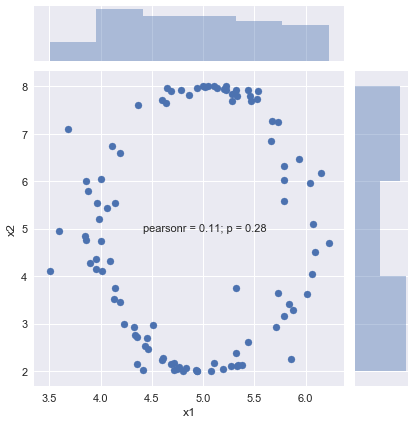

In [137]:
sns.jointplot(x="x1",y="x2",data=plot_data);

Since the distribution of the $x1$ is more close the uniform distribution, I choose to generate $x1$ from a normal distribution between $[4,6]$ (rounded values for better computation, also rounded 1.35 to 1 for the same purpose).

The values of $x2$ will be determined from these $x1$ values and the sign for the roots will be determined via a Gaussian Distribution between $[0,1]$.

The noises for the values be added by the Gaussian distribution between $[0,1]$.

The proposed generative model is below 

\begin{eqnarray}
w & \sim & \mathcal{U}(4,6)  \\
x1 & = & w + \frac{\varepsilon_{1}}{11}\\
x2 & = & 5\pm \sqrt{9 - 9 (w - 5)^2} \pm \frac{\varepsilon_{2}}{13}\\
\varepsilon_{1} & \sim & \mathcal{N}(0,1)\\
\varepsilon_{2} & \sim & \mathcal{N}(0,1)\\
\end{eqnarray}

### 3. Implement generative model and sample data from the model

In [141]:
#Generative Model
#number of points
N = 100
# Kernel
w = 2 * np.random.rand(N) + 4
# Noise for the x1
epsilon1 = np.random.randn(N)
#Noise for the x2
epsilon2 = np.random.randn(N)
x1 = w + epsilon1/11
# sign 
sn = np.sign(np.random.randn(N))
x2 = 5 + sn * np.sqrt(9 - (9 * (w - 5)**2)) - sn * epsilon2/13

generated = {"x1": x1,"x2": x2}
index = [i for i in range(1,N+1)]
g_data = pd.DataFrame(data=generated,index=index)
g_data.head()
g_data.tail()
g_data.describe()


,x1,x2
1,5.630009,7.512250
2,5.670683,7.458730
3,5.897006,6.563924
4,4.869269,2.120313
5,4.218546,6.722362


,x1,x2
96,5.493625,2.647329
97,5.027075,7.995232
98,5.867227,3.298430
99,5.066360,7.968236
100,5.262701,7.770300


,x1,x2
count,100.000000,100.000000
mean,4.986061,4.903246
std,0.581357,2.451584
min,3.937646,1.851968
25%,4.424701,2.527775
50%,4.967987,4.038936
75%,5.474940,7.454534
max,6.138103,8.036144


### 4. Visualize synthetic data to show that your model generates a 'similar dataset 

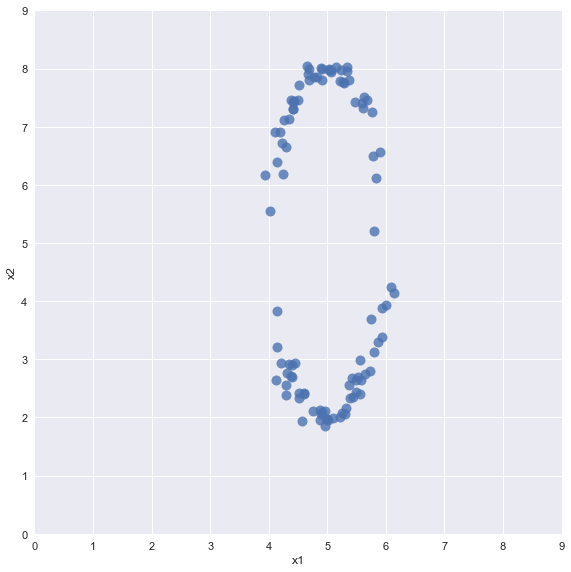

In [142]:
_plot2 = sns.lmplot('x1', 'x2', 
           data=g_data, 
           fit_reg=False, 
           size=8,
           scatter_kws={"marker": "D", 
                        "s": 100})
axes = _plot2.axes
axes[0,0].set_xlim(0,9);
axes[0,0].set_ylim(0,9);

### 5.  How can you assess if two datasets are similar? Discuss